In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'bitcoin_data.csv')
MODEL_PATH = os.path.join(BASE_DIR, '..', 'models', 'bitcoin_lstm.h5')
SCALER_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler.gz')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
precio de cierre de hoy 90,053.23 USD
prediccion del valor del bitocoin los siguientes dias
prediccion mañana: 90318.47 USD
prediccion Pasado: 90104.91 USD


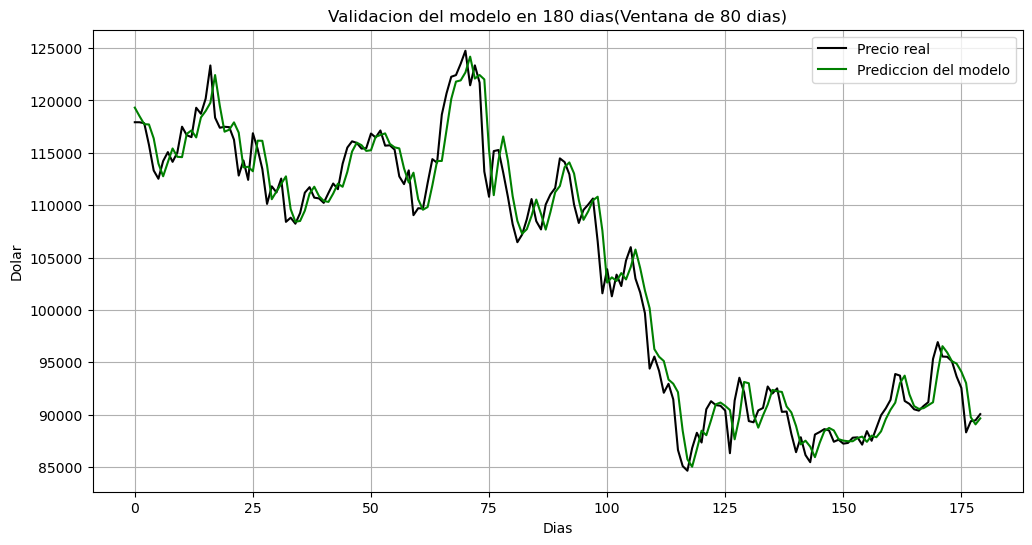

In [3]:
def fp():

    model = load_model(MODEL_PATH)
    scaler =joblib.load(SCALER_PATH)

    df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
    data = df.values
    scaled_data = scaler.transform(data)

    PD = 80 # debe ser igual al de train
    x_test = []
    y_test = []

    start_index = len(scaled_data) - 180 #dias

    for i in range(start_index, len(scaled_data)):
        x_test.append(scaled_data[i-PD:i, 0])
        y_test.append(scaled_data[i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #prediccion sobre datos conocidos
    predicted_prices = model.predict(x_test)
    # quedarse solo con la columna 0  para que el scaler no falle 
    predicted_prices = predicted_prices[:, 0].reshape(-1, 1)
    #invertir escala
    predicted_prices = scaler.inverse_transform(predicted_prices)
    real_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    #prediccion a futuro 
    l_d = scaled_data[-PD:]
    l_d = l_d.reshape(1, PD, 1)

    tomorrow_prediction = model.predict(l_d)
    tomorrow_prediction = tomorrow_prediction.reshape(-1, 1) # girar los datos para poder des-escalar los dias juntos
    tomorrow_price = scaler.inverse_transform(tomorrow_prediction)

    #obtener el precio del ultimo dia real
    last_real_scaled = scaled_data[-1]
    last_real_price = scaler.inverse_transform(last_real_scaled.reshape(-1, 1))
    print(f"precio de cierre de hoy {last_real_price[0][0]:,.2f} USD")

    print("prediccion del valor del bitocoin los siguientes dias")
    print(f"prediccion mañana: {tomorrow_price[0][0]:.2f} USD")
    print(f"prediccion Pasado: {tomorrow_price[1][0]:.2f} USD")

    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color='black', label='Precio real')
    plt.plot(predicted_prices, color='green', label='Prediccion del modelo')
    plt.title(f'Validacion del modelo en 180 dias(Ventana de {PD} dias)')
    plt.xlabel('Dias')
    plt.ylabel('Dolar')
    plt.legend()
    plt.grid(True)
    plt.show()

fp()

parece que el modelo con bitcoin da buenos resultados pues identifica bien los picos y caidas historicos y la predeccion siguente es similiar a la real, problablemente  a que el bitcoin es menos sensible a factores economicos externos en comparacion con el peso chileno, dandole un comportamiento mas predecible, no creo que sea necesario usar el multivariable aqui

In [4]:
DATA_PATH2 = os.path.join(BASE_DIR, '..', 'data', 'clp_data.csv')
MODEL_PATH2 = os.path.join(BASE_DIR, '..', 'models', 'clp_lstm.h5')
SCALER_PATH2 = os.path.join(BASE_DIR, '..', 'models', 'scaler_clp.gz')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
precio de cierre de hoy 865.91 CLP
prediccion del valor del dolar a peso chileno
prediccion mañana: 881.06 CLP
prediccion Pasado: 881.71 CLP


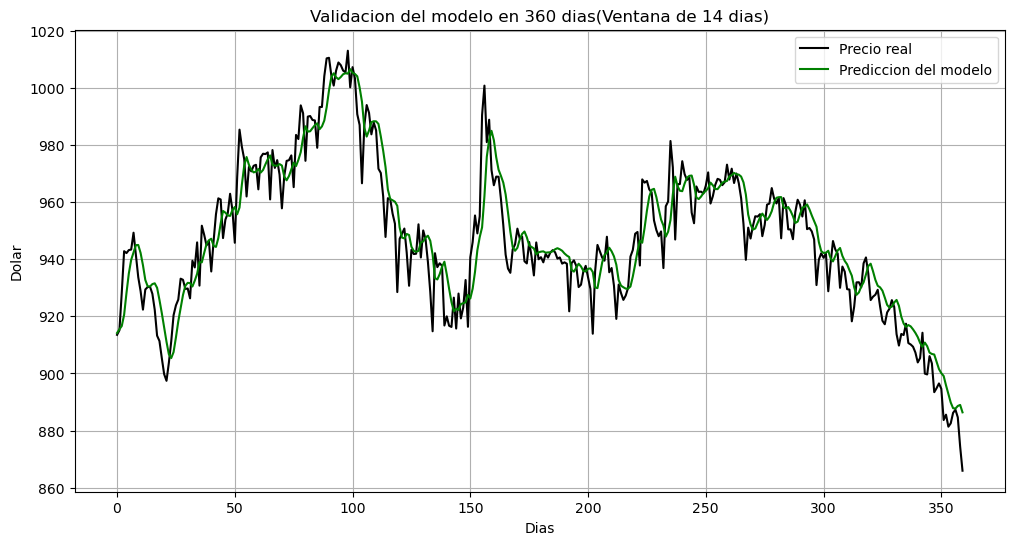

In [5]:
def fp():

    model = load_model(MODEL_PATH2)
    scaler =joblib.load(SCALER_PATH2)

    df = pd.read_csv(DATA_PATH2, index_col=0, parse_dates=True)
    data = df.values
    scaled_data = scaler.transform(data)

    PD = 14 # debe ser igual al de train
    x_test = []
    y_test = []

    start_index = len(scaled_data) - 360 #dias

    for i in range(start_index, len(scaled_data)):
        x_test.append(scaled_data[i-PD:i, 0])
        y_test.append(scaled_data[i, 0])
    
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    #prediccion sobre datos conocidos
    predicted_prices = model.predict(x_test)
    #solo columna 0
    predicted_prices = predicted_prices[:, 0].reshape(-1, 1)
    #invertir escala
    predicted_prices = scaler.inverse_transform(predicted_prices)
    real_prices = scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    #prediccion a futuro 
    l_d = scaled_data[-PD:]
    l_d = l_d.reshape(1, PD, 1)

    tomorrow_prediction = model.predict(l_d)
    tomorrow_prediction = tomorrow_prediction.reshape(-1, 1) # girar los datos para poder desescalar los dias juntos
    tomorrow_price = scaler.inverse_transform(tomorrow_prediction)

    #obtener el precio del ultimo dia real
    last_real_scaled = scaled_data[-1]
    last_real_price = scaler.inverse_transform(last_real_scaled.reshape(-1, 1))
    print(f"precio de cierre de hoy {last_real_price[0][0]:,.2f} CLP")

    print("prediccion del valor del dolar a peso chileno")
    print(f"prediccion mañana: {tomorrow_price[0][0]:.2f} CLP")
    print(f"prediccion Pasado: {tomorrow_price[1][0]:.2f} CLP")

    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color='black', label='Precio real')
    plt.plot(predicted_prices, color='green', label='Prediccion del modelo')
    plt.title(f'Validacion del modelo en 360 dias(Ventana de {PD} dias)')
    plt.xlabel('Dias')
    plt.ylabel('Dolar')
    plt.legend()
    plt.grid(True)
    plt.show()

fp()

el modelo cree que el dolar va a subir pero la realidad es que sigue bajando por factores externos, problema de ocupar solo una variable para predecir el valor pues el peso chileno es mas sensible a cambios externos como el precio del cobre,que el bitcoin que se mantiene mas estable

In [6]:
BASE_DIR = os.getcwd()
DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'clp_multivariable.csv')
MODEL_PATH = os.path.join(BASE_DIR, '..', 'models', 'clp_multi_lstm.h5')
SCALER_X_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler_multi_X.gz')
SCALER_Y_PATH = os.path.join(BASE_DIR, '..', 'models', 'scaler_multi_Y.gz')

Realizar predicciones con el modelo LSTM multivariable a 7 dias con 3 features clp,dolar index y cobrem el yuan fue eliminado, fue necesario modificar el modelo usado en el univariable para logar resultados decentes principalmente agregando una seed,quitando una capa de la red,cambiando el dropout aumentando el batch y las epocas ademas de cambiar las neuronas a 45,20 en las capas, las epocas y batch se aumento por ser ahora un modelo multivariable, mas epocas para mejor convergencia y batch mayor para gradiente mas estable


el entrenamiento tiene mas metricas para comprobar como va, se usa el mean absolute error para interpretar mejor los errores durante el entrenamiento pues es mas directo, tambien se implemento RMSE que hace lo mismo pero penalizando errores grandes y MAPE para medir error en porcentajes


al final se implmento un baseline como metrica de comparacion relativa simple,asume que mañana el valor sera igual que hoy, es para tener algo con que comparar el desempeño del modelo


Datos de validacion:

X_test shape: (354, 70, 3)
y_test shape: (354, 7)

metricas de validacion

Dia +1: MAE=7.39 CLP | RMSE=9.73 CLP | MAPE=0.78%
Dia +2: MAE=8.71 CLP | RMSE=11.34 CLP | MAPE=0.91%
Dia +3: MAE=9.42 CLP | RMSE=12.23 CLP | MAPE=0.99%
Dia +4: MAE=10.41 CLP | RMSE=13.34 CLP | MAPE=1.10%
Dia +5: MAE=11.18 CLP | RMSE=14.36 CLP | MAPE=1.18%
Dia +6: MAE=12.31 CLP | RMSE=15.78 CLP | MAPE=1.30%
Dia +7: MAE=12.96 CLP | RMSE=16.66 CLP | MAPE=1.36%

Promedio: MAE=10.34 CLP | RMSE=13.54 CLP | MAPE=1.09%

Ultimo precio conocido (2026-01-23): 865.13 CLP

Prediccion para los proximos 7 dias:

Día +1 (2026-01-24): 875.46 CLP (+10.33 / +1.19%)
Día +2 (2026-01-25): 874.35 CLP (+9.22 / +1.07%)
Día +3 (2026-01-26): 876.76 CLP (+11.63 / +1.34%)
Día +4 (2026-01-27): 876.87 CLP (+11.74 / +1.36%)
Día +5 (2026-01-28): 877.00 CLP (+11.87 / +1.37%)
Día +6 (2026-01-29): 876.82 CLP (+11.69 / +1.35%)
Día +7 (2026-01-30): 874.96 CLP (+9.83 / +1.14%)


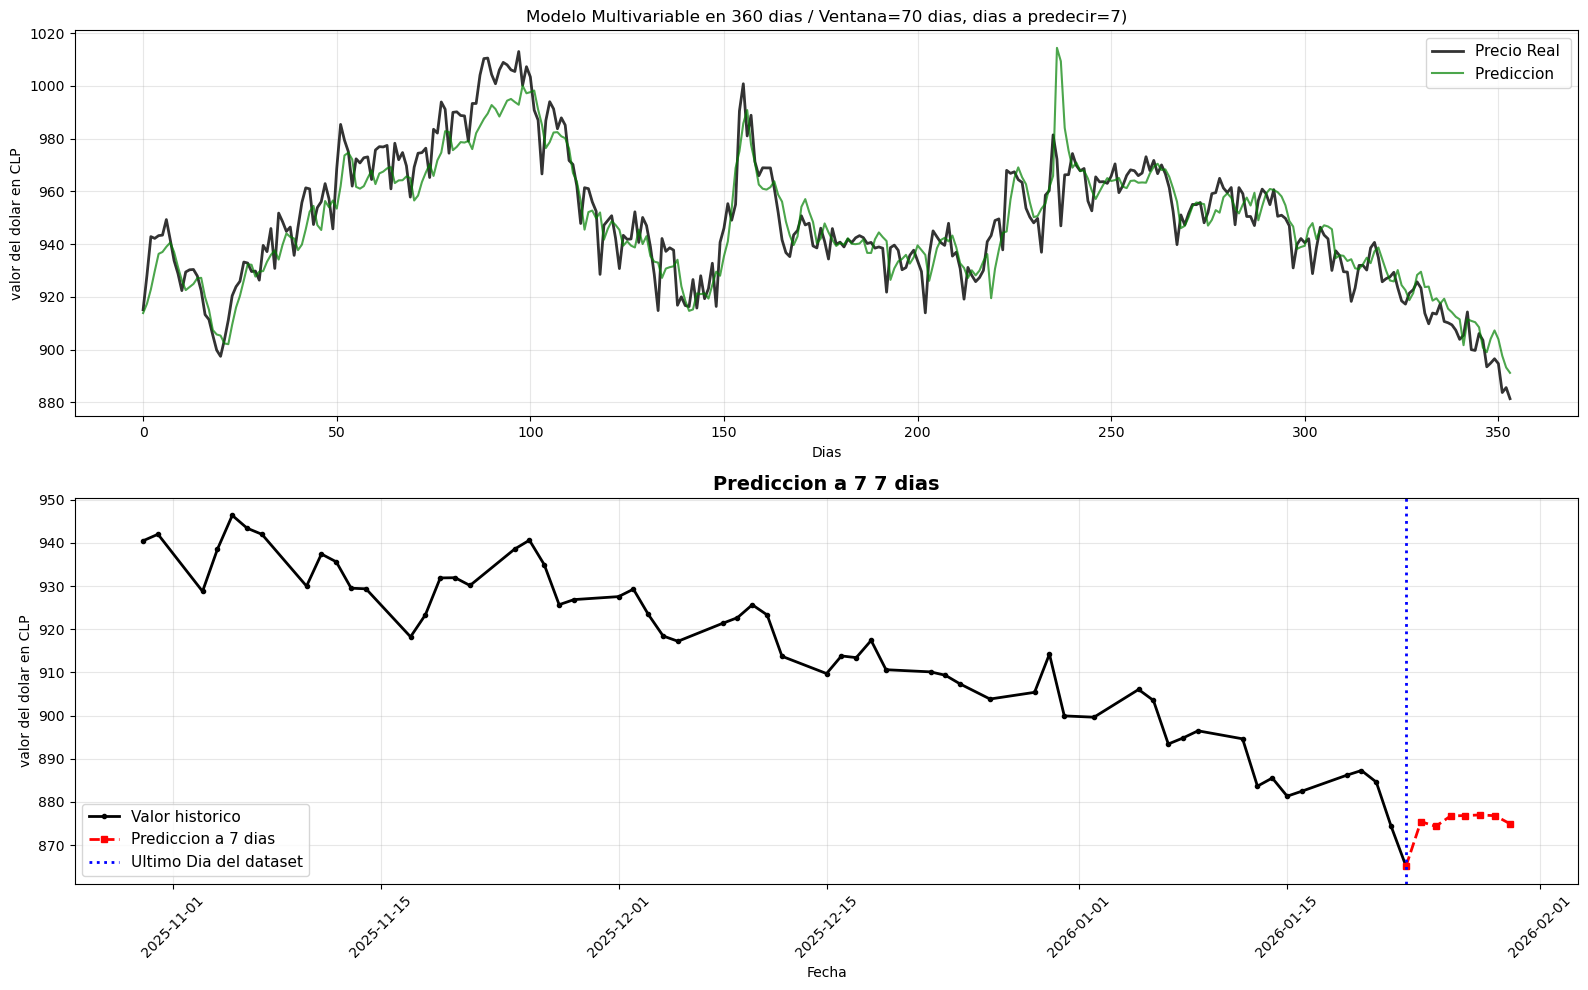

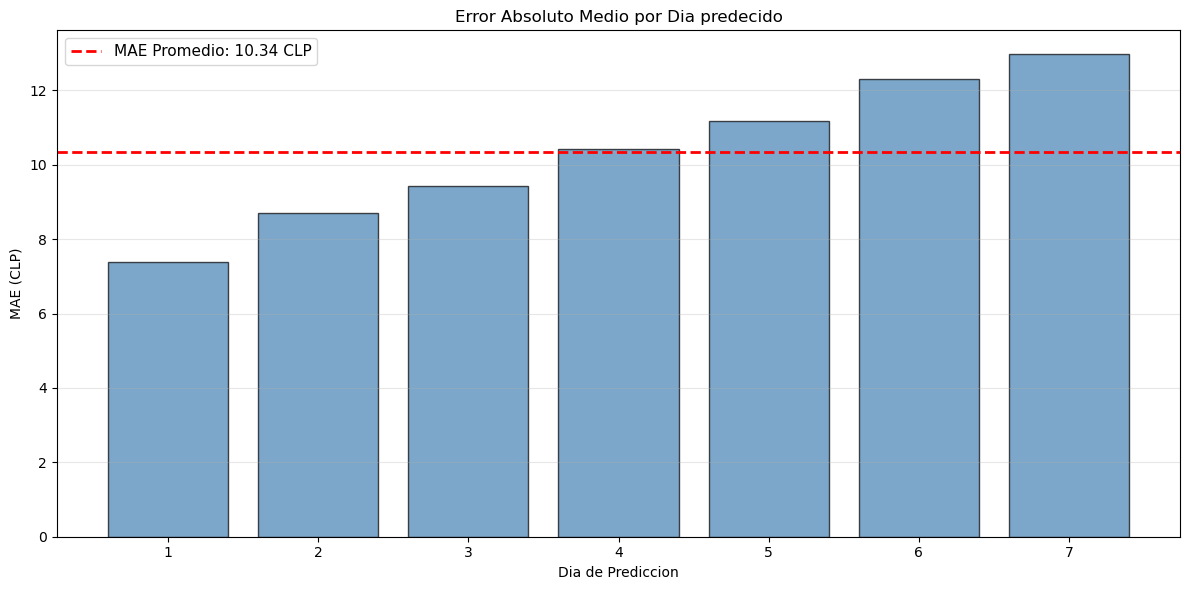

In [7]:
def predict_clp_multi():
    
    model = load_model(MODEL_PATH)
    scaler_x = joblib.load(SCALER_X_PATH)  # Scaler de los features clp,dolar index y cobre
    scaler_y = joblib.load(SCALER_Y_PATH)  # Scaler del target CLP
    
    # Cargar datos
    df = pd.read_csv(DATA_PATH, index_col=0, parse_dates=True)
    features = ['CLP', 'Dolar_Index', 'Cobre']
    data = df[features].values  # Shape: (n_rows, 3)
    
    # Escalar los features
    scaled_data = scaler_x.transform(data)  # Shape: (n_rows, 3)
    
    #ventana y dias a predecir
    PD = 70   
    PDC = 7   
    
    x_test = []
    y_test = []
    
    start_index = len(scaled_data) - 360  
    
    for i in range(start_index, len(scaled_data) - PDC + 1):
        x_test.append(scaled_data[i-PD:i, :])  # Shape: (PD, 3)
        y_test.append(scaled_data[i:i+PDC, 0])  # Shape: (PDC,)
    
    x_test = np.array(x_test)  # Shape: (samples, PD, 3)
    y_test = np.array(y_test)  # Shape: (samples, PDC)
    
    print(f"\nDatos de validacion:\n")
    print(f"X_test shape: {x_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    # Prediccion sobre datos conocidos
    predicted_prices_scaled = model.predict(x_test, verbose=0)  # Shape: (samples, PDC)
    
    # Desnormalizar predicciones usando el scaler de y
    predicted_prices = scaler_y.inverse_transform(predicted_prices_scaled)
    real_prices = scaler_y.inverse_transform(y_test)
    
    # Calcular métricas por día
    print(f"\nmetricas de validacion\n")
    
    for day in range(PDC):
        mae_day = mean_absolute_error(real_prices[:, day], predicted_prices[:, day])
        rmse_day = np.sqrt(mean_squared_error(real_prices[:, day], predicted_prices[:, day]))
        mape_day = np.mean(np.abs((real_prices[:, day] - predicted_prices[:, day]) / real_prices[:, day])) * 100
        print(f"Dia +{day+1}: MAE={mae_day:.2f} CLP | RMSE={rmse_day:.2f} CLP | MAPE={mape_day:.2f}%")
    
    # Promedio de todos los dias
    mae_total = mean_absolute_error(real_prices, predicted_prices)
    rmse_total = np.sqrt(mean_squared_error(real_prices, predicted_prices))
    mape_total = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
    print(f"\nPromedio: MAE={mae_total:.2f} CLP | RMSE={rmse_total:.2f} CLP | MAPE={mape_total:.2f}%\n")
    
    # PREDICCION FUTURA Proximos 7 dias
    # Tomar los ultimos PD dias para predecir el futuro
    last_window = scaled_data[-PD:]  # Shape: (PD, 3)
    last_window = last_window.reshape(1, PD, 3)  # Shape: (1, PD, 3)
    
    # Predecir proximos PDC dias
    future_prediction_scaled = model.predict(last_window, verbose=0)  # Shape: (1, PDC)
    future_prediction = scaler_y.inverse_transform(future_prediction_scaled)  # Shape: (1, PDC)
    
    # Obtener el ultimo precio real
    last_real_price = df['CLP'].iloc[-1]
    last_date = df.index[-1]
    
    print(f"Ultimo precio conocido ({last_date.strftime('%Y-%m-%d')}): {last_real_price:,.2f} CLP\n")
    print(f"Prediccion para los proximos {PDC} dias:\n")
    
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=PDC, freq='D')
    
    for i, (date, price) in enumerate(zip(future_dates, future_prediction[0])):
        change = price - last_real_price
        change_pct = (change / last_real_price) * 100
        print(f"Día +{i+1} ({date.strftime('%Y-%m-%d')}): {price:,.2f} CLP ({change:+.2f} / {change_pct:+.2f}%)")
    
    
    # Grafico  Validacion completa en 360 dias
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Solo mostrar predicciones del día 1 (más cercano) para claridad
    axes[0].plot(real_prices[:, 0], color='black', linewidth=2, label='Precio Real ', alpha=0.8)
    axes[0].plot(predicted_prices[:, 0], color='green', linewidth=1.5, label='Prediccion ', alpha=0.7)
    axes[0].set_title(f'Modelo Multivariable en 360 dias / Ventana={PD} dias, dias a predecir={PDC})')
    axes[0].set_xlabel('Dias')
    axes[0].set_ylabel('valor del dolar en CLP')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Grafico ultimos 60 días + prediccion futura
    recent_days = 60
    recent_real = df['CLP'].iloc[-recent_days:].values
    recent_dates = df.index[-recent_days:]
    
    axes[1].plot(recent_dates, recent_real, color='black', linewidth=2, label='Valor historico', marker='o', markersize=3)
    
    # Agregar predicción futura
    future_plot_dates = pd.date_range(start=last_date, periods=PDC+1, freq='D')
    future_plot_prices = np.concatenate([[last_real_price], future_prediction[0]])
    
    axes[1].plot(future_plot_dates, future_plot_prices, color='red', linewidth=2, label='Prediccion a 7 dias', marker='s', markersize=5, linestyle='--')
    axes[1].axvline(x=last_date, color='blue', linestyle=':', linewidth=2, label='Ultimo Dia del dataset')
    
    axes[1].set_title(f'Prediccion a {PDC} 7 dias', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Fecha')
    axes[1].set_ylabel('valor del dolar en CLP')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Comparacion de errores por dia
    plt.figure(figsize=(12, 6))
    mae_per_day = [mean_absolute_error(real_prices[:, i], predicted_prices[:, i]) for i in range(PDC)]
    
    plt.bar(range(1, PDC+1), mae_per_day, color='steelblue', alpha=0.7, edgecolor='black')
    plt.axhline(y=mae_total, color='red', linestyle='--', linewidth=2, label=f'MAE Promedio: {mae_total:.2f} CLP')
    plt.title('Error Absoluto Medio por Dia predecido')
    plt.xlabel('Dia de Prediccion')
    plt.ylabel('MAE (CLP)')
    plt.xticks(range(1, PDC+1))
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    predict_clp_multi()

el modelo igual inciste en predecir que el dolar va a subir, aunque ya no es una subida tan grande como con el univariado pero el sesgo esta ahi presente, puede deberse a la tendencia historica en los datos de train, en el univariado predijo 881 y el multivariado 875, demostrando una mejora

el principal problema fue tener que encontrar la mejor configuracion de hyperparametros, fue mas complicado que en el univariado y me llevo mas tiempo de prueba y error probando opciones como el batch normalization, ajustar manualmente el learning rate o implementar regularización L2, la mayoria de esto no funciono para mejorar el modelo

tambien note que el error va a aumentado a medida que los dias de prediccion aumentan, se ve que el dia 1 es una prediccion aceptable, pero la de los siguientes dias es mas como una repiticion del anterior, como lo que hace el baseline, se podria intentar dejar los dias a predecir PDC como estaban en el univariable, implementar regularización L2 no funciono

y aunque en el primer grafico si comparamos con los precios historicos la predeccion es parecida, en dos puntos da un bajon y una subida que nunca paso